# KURULUM

In [1]:
pip install pysrt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.4/104.4 kB 876.0 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pysrt: filename=pysrt-1.1.2-py3-none-any.whl size=13444 sha256=5a567d682aa1f3977555a30485a7663dba3639155a965cc0bff5334e956a0a69
  Stored in directory: /Users/sahideseker/Library/Caches/pip/wheels/c3/34/f1/ae1d86b7f454100c10f7ab8dc411303b7834e7f40e343ca2c0
Successfully built pysrt
Note: you may need to restart the kernel to use updated packages.


In [120]:
import pysrt

subs = pysrt.open("The.Shawshank.Redemption.5.1.EnSub.1994BD1080p_SharePirate.srt")

# Birleştirilmiş altyazıları tutacak liste
merged_subs = []

# Altyazıları birleştir
current_sub = subs[0]
for sub in subs[1:]:
    # Eğer cümlenin bittiğini gösteren işaretler yoksa
    if not sub.text.endswith((".", "!", "?", "...")):
        current_sub.text += " " + sub.text
    else:
        merged_subs.append(current_sub)
        current_sub = sub

# Son altyazıyı da ekleyelim
merged_subs.append(current_sub)

# mrs., ms., Mrs., Ms., MRS., ve MS. ifadelerinin yanındaki noktaları sil
for sub in merged_subs:
    sub.text = sub.text.replace("mrs.", "mrs").replace("mr.", "ms").replace("Mrs.", "Mrs").replace("Mr.", "Ms").replace("MRS.", "MRS").replace("Mr.", "MS")

# Yeni altyazı dosyasını oluştur
output_subs = pysrt.SubRipFile()
for i, sub in enumerate(merged_subs, start=1):
    sub.index = i
    output_subs.append(sub)

# Yeni altyazı dosyasını düzenleyelim
for sub in output_subs:
    lines = sub.text.split("\n")
    sub.text = " ".join(lines)

# Altyazı dosyasını kaydet
output_subs.save("merged_subtitles.srt")


In [148]:
import pysrt

# Altyazı dosyasını aç
subs = pysrt.open("merged_subtitles.srt")

# Yeni altyazıları tutacak liste
new_subs = []

# Altyazı metinlerini işle ve yeni altyazıları oluştur
for sub in subs:
    sentences = sub.text.split('. ')
    for separator in ['!', '?', '...']:
        temp_sentences = []
        for sentence in sentences:
            temp_sentences.extend(sentence.split(separator))
        sentences = temp_sentences
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]
    
    # '-' işaretlerini boşlukla değiştirme
    sentences = [sentence.replace('-', ' ') for sentence in sentences]
    
    # '- ' işaretlerini silme
    sentences = [sentence.replace('- ', '') for sentence in sentences]
    
 
    # Çift tırnak işaretlerini silme
    sentences = [sentence.replace('"', '') for sentence in sentences]
    
     # Satır başındaki boşlukları silme
    sentences = [sentence.lstrip() for sentence in sentences]
    
    for sentence in sentences:
        new_subs.append(pysrt.SubRipItem(start=sub.start, end=sub.end, text=sentence))

# Yeni altyazıları srt dosyasına yaz
with open("modified_subtitles.srt", "w") as f:
    for i, sub in enumerate(new_subs, start=1):
        f.write(str(i) + "\n")
        f.write(str(sub.start) + " --> " + str(sub.end) + "\n")
        f.write(sub.text + "\n")
        f.write("\n")


In [149]:
import pysrt

# Altyazı dosyasını aç
subs = pysrt.open("modified_subtitles.srt")

# Tüm cümleleri yazdır
for sub in subs:
    print(sub.text)


Ms Dufresne, describe
the confrontation you had with your wife the night she was murdered.
It was very bitter.
She said she was glad I knew, that she hated all the sneaking around.
And she said that she wanted a divorce in Reno.
What was your response
I told her I would not grant one
I'll see you in hell before I see you in Reno.
Those were your words, according to your neighbors.
If they say so.
I really don't remember
I was upset.
What happened after you argued with your wife
She packed a bag.
She packed a bag to go and stay with Ms Quentin.
Glenn Quentin, golf pro at the Snowden Hills Country Club
whom you had discovered was your wife's lover.
Did you follow her
I went to a few bars first.
Later, I drove to his house to confront them
They weren't home.
I parked in the turnout
and waited.
With what intention
I'm not sure.
I was confused..
drunk.
I think..
mostly I wanted to scare them.
When they arrived, you went up to the house and murdered them.
No, I was sobering up.
I got back in

In [152]:
import pysrt

# Altyazı dosyasını aç
subs = pysrt.open("modified_subtitles.srt")

# Tüm cümleleri yazdır
for i, sub in enumerate(subs, start=1):
    print(f"Satır {i}: {sub.text}")


Satır 1: Ms Dufresne, describe
Satır 2: the confrontation you had with your wife the night she was murdered.
Satır 3: It was very bitter.
Satır 4: She said she was glad I knew, that she hated all the sneaking around.
Satır 5: And she said that she wanted a divorce in Reno.
Satır 6: What was your response
Satır 7: I told her I would not grant one
Satır 8: I'll see you in hell before I see you in Reno.
Satır 9: Those were your words, according to your neighbors.
Satır 10: If they say so.
Satır 11: I really don't remember
Satır 12: I was upset.
Satır 13: What happened after you argued with your wife
Satır 14: She packed a bag.
Satır 15: She packed a bag to go and stay with Ms Quentin.
Satır 16: Glenn Quentin, golf pro at the Snowden Hills Country Club
Satır 17: whom you had discovered was your wife's lover.
Satır 18: Did you follow her
Satır 19: I went to a few bars first.
Satır 20: Later, I drove to his house to confront them
Satır 21: They weren't home.
Satır 22: I parked in the turnout

In [150]:
import pysrt
from collections import Counter

# Altyazı dosyasını aç
subs = pysrt.open("modified_subtitles.srt")

# Tüm cümleleri al
sentences = [sub.text for sub in subs]

# Cümleleri say
sentence_counts = Counter(sentences)

# En çok tekrar eden cümleleri bul
most_common_sentences = sentence_counts.most_common()

# Sonuçları yazdır
for sentence, count in most_common_sentences:
    print(f"Satır: {sentence} - Tekrar Sayısı: {count}")


Satır: Yes, sir. - Tekrar Sayısı: 8
Satır: What - Tekrar Sayısı: 6
Satır: Yes, sir - Tekrar Sayısı: 5
Satır: No - Tekrar Sayısı: 4
Satır: Me - Tekrar Sayısı: 4
Satır: Zihuatanejo. - Tekrar Sayısı: 4
Satır: No. - Tekrar Sayısı: 3
Satır: You feel you've been rehabilitated - Tekrar Sayısı: 3
Satır: Bullshit - Tekrar Sayısı: 3
Satır: Lights out - Tekrar Sayısı: 3
Satır: Fresh fish - Tekrar Sayısı: 3
Satır: Let's go - Tekrar Sayısı: 3
Satır: Book - Tekrar Sayısı: 3
Satır: Thanks. - Tekrar Sayısı: 3
Satır:  - Tekrar Sayısı: 3
Satır: Hey, Red. - Tekrar Sayısı: 2
Satır: Return to your cellblocks for evening count. - Tekrar Sayısı: 2
Satır: Any questions - Tekrar Sayısı: 2
Satır: Turn around. - Tekrar Sayısı: 2
Satır: Right - Tekrar Sayısı: 2
Satır: I want to go home - Tekrar Sayısı: 2
Satır: Why'd you do it - Tekrar Sayısı: 2
Satır: What do you think - Tekrar Sayısı: 2
Satır: I understand you're a man that knows how to get things. - Tekrar Sayısı: 2
Satır: So - Tekrar Sayısı: 2
Satır: Red. - T

In [155]:
import pysrt
from collections import Counter

# Altyazı dosyasını aç
subs = pysrt.open("modified_subtitles.srt")

# Tüm cümleleri al
sentences = [sub.text for sub in subs]

# Cümleleri say
sentence_counts = Counter(sentences)

# En çok tekrar eden cümleleri bul
most_common_sentences = sentence_counts.most_common()

# Boş satırları belirle
empty_sentences = [sentence for sentence, count in most_common_sentences if not sentence]

# Boş satırları sil
new_subs = [sub for sub in subs if sub.text not in empty_sentences]

# Yeni altyazıları srt dosyasına yaz
with open("modified_subtitles.srt", "w") as f:
    for i, sub in enumerate(new_subs, start=1):
        f.write(str(i) + "\n")
        f.write(str(sub.start) + " --> " + str(sub.end) + "\n")
        f.write(sub.text + "\n")
        f.write("\n")

# Sonuçları yazdır
if empty_sentences:
    print("Boş satırlar silindi. Güncellenmiş veri seti 'modified_subtitles_cleaned.srt' olarak kaydedildi.")
else:
    print("Altyazı dosyasında boş satır bulunmuyor.")


Boş satırlar silindi. Güncellenmiş veri seti 'modified_subtitles_cleaned.srt' olarak kaydedildi.


In [156]:
import pysrt

# Altyazı dosyasını aç
subs = pysrt.open("modified_subtitles.srt")

# Tüm cümleleri yazdır
for i, sub in enumerate(subs, start=1):
    print(f"Satır {i}: {sub.text}")


Satır 1: Ms Dufresne, describe
Satır 2: the confrontation you had with your wife the night she was murdered.
Satır 3: It was very bitter.
Satır 4: She said she was glad I knew, that she hated all the sneaking around.
Satır 5: And she said that she wanted a divorce in Reno.
Satır 6: What was your response
Satır 7: I told her I would not grant one
Satır 8: I'll see you in hell before I see you in Reno.
Satır 9: Those were your words, according to your neighbors.
Satır 10: If they say so.
Satır 11: I really don't remember
Satır 12: I was upset.
Satır 13: What happened after you argued with your wife
Satır 14: She packed a bag.
Satır 15: She packed a bag to go and stay with Ms Quentin.
Satır 16: Glenn Quentin, golf pro at the Snowden Hills Country Club
Satır 17: whom you had discovered was your wife's lover.
Satır 18: Did you follow her
Satır 19: I went to a few bars first.
Satır 20: Later, I drove to his house to confront them
Satır 21: They weren't home.
Satır 22: I parked in the turnout

In [175]:
import pysrt
import string
from collections import Counter

# Altyazı dosyasını aç
subs = pysrt.open("modified_subtitles.srt")

# Tüm cümleleri al ve noktalama işaretlerini temizle
sentences = [sub.text for sub in subs]
sentences = [sentence.translate(str.maketrans("", "", string.punctuation)) for sentence in sentences]

# Cümleleri say
sentence_counts = Counter(sentences)

# En çok tekrar eden cümleleri bul
most_common_sentences = sentence_counts.most_common()

# Tabloyu oluştur ve yazdır
for sentence, count in most_common_sentences:
    print(f" {sentence:<100} {count}")


 Yes sir                                                                                              13
 No                                                                                                   7
 What                                                                                                 6
 Bullshit                                                                                             4
 Me                                                                                                   4
 Zihuatanejo                                                                                          4
 You feel youve been rehabilitated                                                                    3
 On your feet                                                                                         3
 Turn around                                                                                          3
 Right                                                         

In [190]:
import pysrt
import string
from collections import Counter

# Altyazı dosyasını aç
subs = pysrt.open("modified_subtitles.srt")

# Tüm cümleleri al ve noktalama işaretlerini ve fazla boşluk karakterlerini temizle
sentences = [sub.text for sub in subs]
sentences = [sentence.translate(str.maketrans("", "", string.punctuation)) for sentence in sentences]
sentences = [" ".join(sentence.split()) for sentence in sentences]

# Kelimeleri ayır ve büyük/küçük harf duyarlılığını kaldır
words = [word.lower() for sentence in sentences for word in sentence.split()]

# Kelimeleri say
word_counts = Counter(words)

# Sonuçları yazdır
print(f"{'KELİMELER':<20}{'TEKRAR SAYISI'}")
for word, count in word_counts.most_common():
    print(f"{word:<20}{count}")


KELİMELER           TEKRAR SAYISI
the                 356
i                   340
you                 336
a                   304
to                  280
it                  179
of                  173
that                159
and                 156
in                  152
me                  105
this                89
for                 86
he                  85
what                81
your                76
my                  75
on                  75
was                 74
is                  73
up                  67
here                64
thats               62
him                 61
out                 60
his                 58
get                 58
like                57
all                 56
do                  56
have                52
with                51
andy                50
dont                49
im                  49
man                 48
its                 47
so                  46
not                 45
got                 45
be                  45
no          

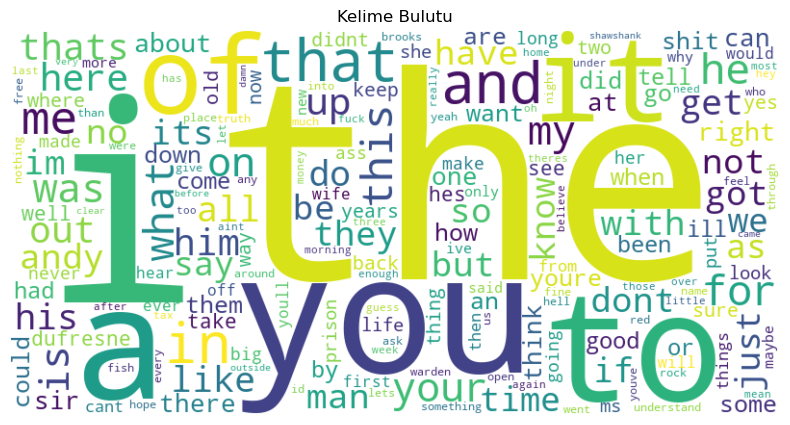

In [196]:
import pysrt
import string
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Altyazı dosyasını aç
subs = pysrt.open("modified_subtitles.srt")

# Tüm cümleleri al ve noktalama işaretlerini ve fazla boşluk karakterlerini temizle
sentences = [sub.text for sub in subs]
sentences = [sentence.translate(str.maketrans("", "", string.punctuation)) for sentence in sentences]
sentences = [" ".join(sentence.split()) for sentence in sentences]

# Kelimeleri ayır ve büyük/küçük harf duyarlılığını kaldır
words = [word.lower() for sentence in sentences for word in sentence.split()]

# Kelimeleri say
word_counts = Counter(words)

# Kelime bulutunu oluştur
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)

# Kelime bulutunu görselleştir
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Kelime Bulutu")
plt.show()
